In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageSequence
import numpy as np
import random


GIF image

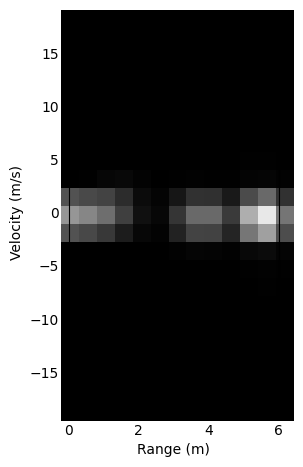

In [26]:

# Load the GIF file
image_path = '/Users/danielcopeland/Library/Mobile Documents/com~apple~CloudDocs/MIT Masters/DRL/Masters Thesis/BalanceBeam/images/SampleRDM-3.png'
image = Image.open(image_path)

# Convert to numpy array
image_array = np.array(image)

# Create figure and axes
fig, ax = plt.subplots(figsize=(12/4, 23/4))  # Aspect ratio 2:1 to represent the 6m x 1m/s range

# Display the image
ax.imshow(image_array)

# Hide the original image axis
ax.axis('off')

# Create a new Axes instance with the desired limits on top of the image
ax2 = fig.add_axes([0.15, 0.15, 0.7, 0.7])  # This is the position for the new axes
ax2.patch.set_alpha(0)  # Make new axes background transparent

y_max = 1.72 * 11

# Set the limits of the new axes to match the desired physical units
ax2.set_xlim(0, 6)
ax2.set_ylim(-y_max, y_max)

# Label the new axes
ax2.set_xlabel('Range (m)')
ax2.set_ylabel('Velocity (m/s)')

# Make the new axes ticks invisible
ax2.tick_params(
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,       # ticks along the left edge are off
    labelbottom= True , # labels along the bottom edge are off
    labelleft=True    # labels along the left edge are off
)

plt.show()


In [25]:
# Given parameters
f_c = 24e9  # Carrier frequency in Hz (24 GHz)
c = 3e8  # Speed of light in m/s
N_chirps = 128  # Number of chirps per frame
T_chirp = 284e-6  # Chirp duration in seconds
B = 200e6  # Bandwidth in Hz (200 MHz)

# Calculate wavelength
lambda_radar = c / f_c

# Calculate the frame duration (observation time for Doppler)
T_frame = N_chirps * T_chirp

# Calculate velocity resolution per pixel
delta_V_per_pixel = c / (2 * B * T_frame)

delta_V_per_pixel


20.631602112676052

Spiderweb Plots

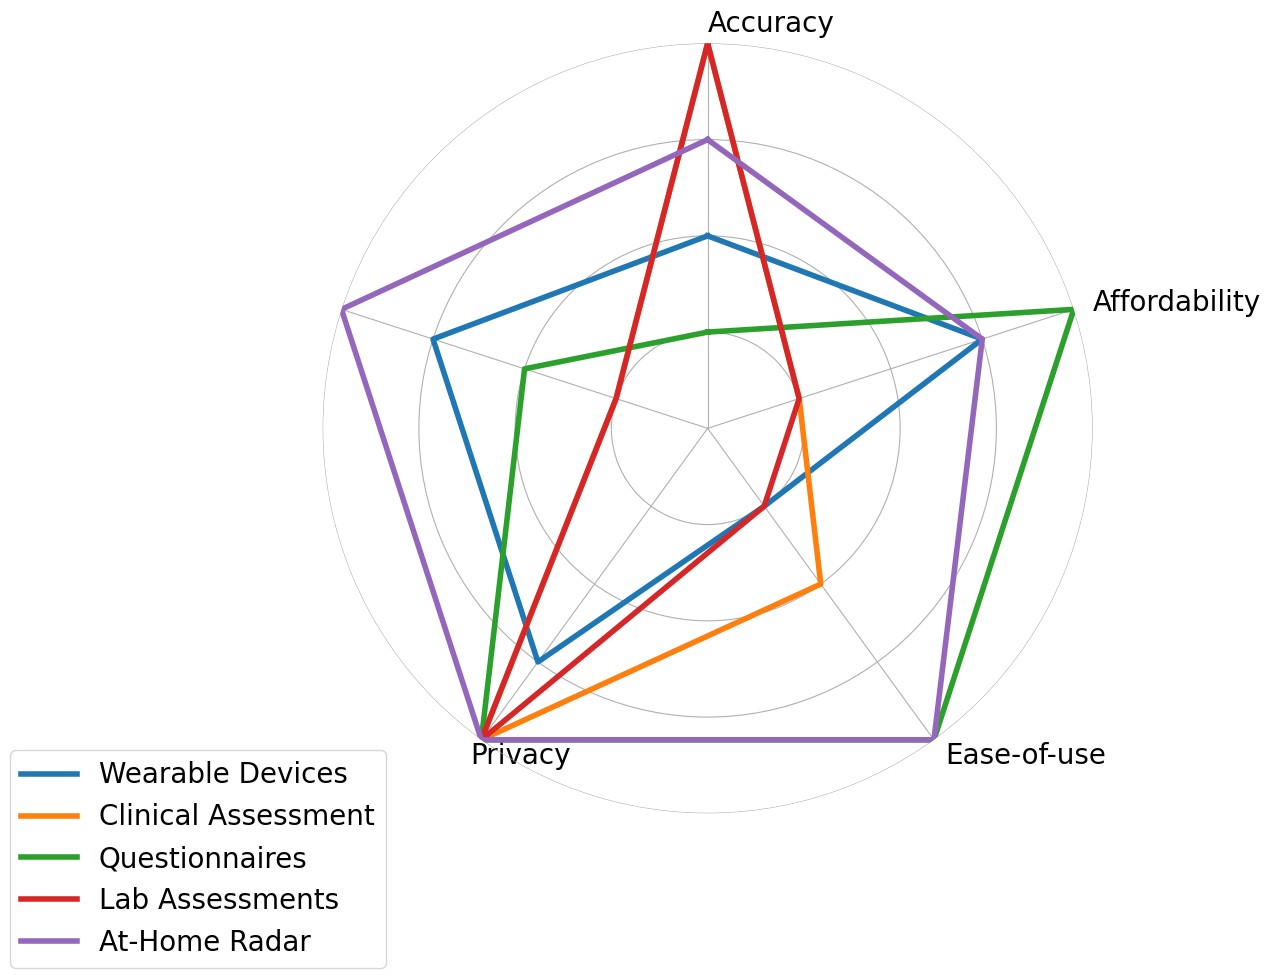

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define data for Radar Plot
data = {
    'group': ['Wearable Devices', 'Clinical Assessment', 'Questionnaires', 'Lab Assessments', 'At-Home Radar'],
    'Accuracy': [2, 4, 1, 4, 3],
    'Affordability': [3, 1, 4, 1, 3],
    'Ease-of-use': [1, 2, 4, 1, 4],
    'Privacy': [3, 4, 4, 4, 4],
    '': [3, 1, 2, 1, 4]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Number of variables we're plotting.
categories = list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Draw one axe per variable + add labels more outside

plt.xticks(angles[:-1], categories, color='black', size=20, ha='left')

# Draw ylabels - moving radial labels further out by adjusting the radial distance
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4], ["", "", "", ""], color="grey", size=20)
plt.ylim(0, 4)

# Plot each individual = each line of the data
# I add a line to the plot for each 'group'
for i, row in df.iterrows():
    values = df.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=4, linestyle='solid', label=df.loc[i]['group'])

# Modify the grid lines (the outer circle) to straight lines
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)  # clockwise
ax.set_frame_on(False)  # remove the frame


# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=20)

plt.show()


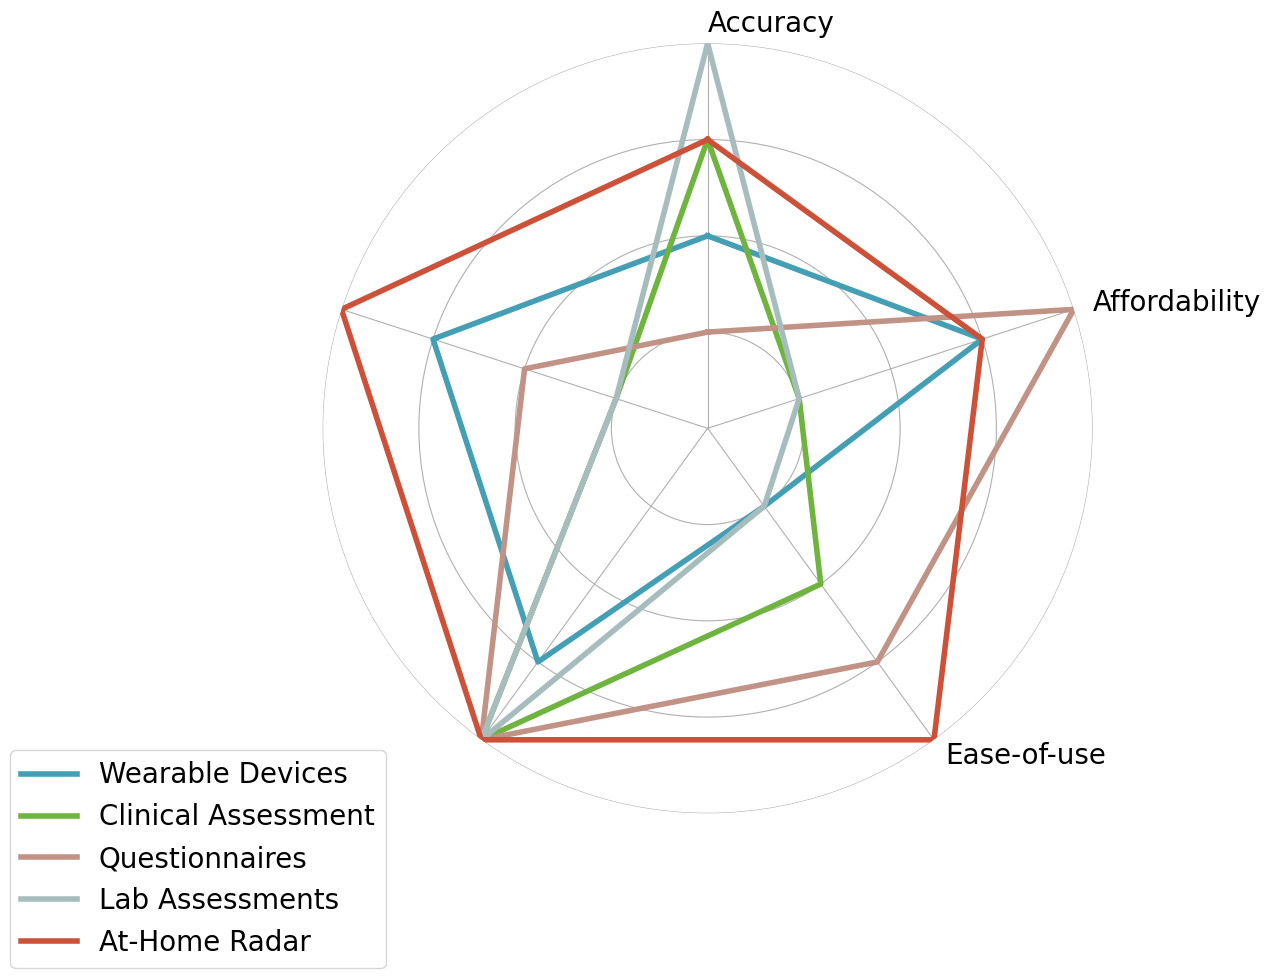

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define data for Radar Plot
data = {
    'group': ['Wearable Devices', 'Clinical Assessment', 'Questionnaires', 'Lab Assessments', 'At-Home Radar'],
    'Accuracy': [2, 3, 1, 4, 3],
    'Affordability': [3, 1, 4, 1, 3],
    'Ease-of-use': [1, 2, 3, 1, 4],
    ' ': [3, 4, 4, 4, 4],
    '': [3, 1, 2, 1, 4]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Number of variables we're plotting.
categories = list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Draw one axe per variable + add labels more outside
plt.xticks(angles[:-1], categories, color='black', size=20, ha='left')

# Draw ylabels - moving radial labels further out by adjusting the radial distance
ax.set_rlabel_position(0)
plt.yticks([1, 2, 3, 4], ["", "", "", ""], color="grey", size=20)
plt.ylim(0, 4)

# Color settings based on the user's specification
colors = ['#449fb5', '#6eb43e', '#c19386', '#a7bcbd', '#cd5138']

# Plot each individual = each line of the data
# I add a line to the plot for each 'group'
for i, row in df.iterrows():
    values = df.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=4, linestyle='solid', label=df.loc[i]['group'], color=colors[i])

# Modify the grid lines (the outer circle) to straight lines
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)  # clockwise
ax.set_frame_on(False)  # remove the frame

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=20)

plt.show()
